In [83]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [149]:
df_Cal = pd.ExcelFile('California_2016.xlsx').parse('California_2016')  #NaN values removed and data managed in SQL prior to loading
Cal_data = df_Cal.values
df_Tex = pd.ExcelFile('Texas_2016.xlsx').parse('Texas_2016')  
Tex_data = df_Tex.values
print ("done")

done


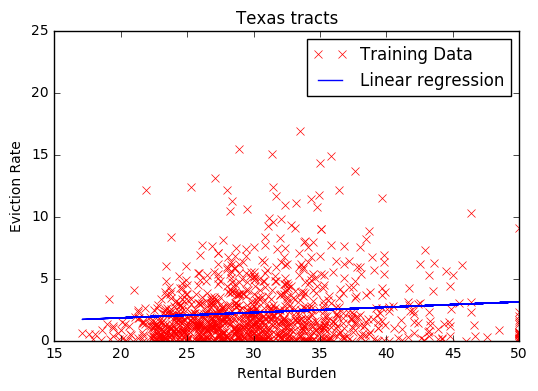

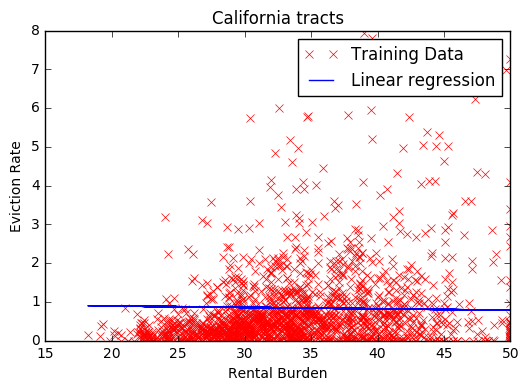

In [161]:
#Step 2: Linear Regression    
y_tex=np.matrix(Tex_data[:,14])   #we define this as a matrix so that the vectorization is correct
y_cal=np.matrix(Cal_data[:,14])   #we define this as a matrix so that the vectorization is correct


#12 is evictions
#13 is eviction-filings
#14 is eviction-rate
#15 is eviction-filing-rate

#Cal_filings = np.transpose(np.matrix(Cal_data[:,4]))
#Cal_evictions = np.transpose(np.matrix(Cal_data[:,5]))
Cal_poverty = np.transpose(np.matrix(Cal_data[:,2]))
Cal_burden = np.transpose(np.matrix(Cal_data[:,3]))

Tex_poverty = np.transpose(np.matrix(Tex_data[:,2]))
Tex_burden = np.transpose(np.matrix(Tex_data[:,3]))

X_tex = np.concatenate((np.ones((len(Tex_data[:,0]),1)),Tex_burden),axis=1)
X_cal = np.concatenate((np.ones((len(Cal_data[:,0]),1)),Cal_burden),axis=1)


#Column 1 contains 1s (necessary for regression) column 2-3 contain indicator variables
m_tex = len(y_tex) # number of training examples
m_cal = len(y_cal)

theta_tex = np.matrix([[1.0],[1.0]]);  #initial guess, theta(0) = y-intercept, theta(1) = slope
theta_cal = np.matrix([[1.0],[1.0]]);

alpha = .0000001;  #training step

num_iters = 1000;
#J_history = np.zeros((num_iters, 1));

for iter in range(1,num_iters):
    temp0_tex = theta_tex[0,0] - (alpha*(1/m_tex))*(theta_tex.transpose()*X_tex.transpose()-y_tex)*X_tex[:,0];
    temp1_tex = theta_tex[1,0] - (alpha*(1/m_tex))*(theta_tex.transpose()*X_tex.transpose()-y_tex)*X_tex[:,1];
    theta_tex[0,0] = temp0_tex;
    theta_tex[1,0] = temp1_tex;
    
    temp0_cal = theta_cal[0,0] - (alpha*(1/m_cal))*(theta_cal.transpose()*X_cal.transpose()-y_cal)*X_cal[:,0];
    temp1_cal = theta_cal[1,0] - (alpha*(1/m_cal))*(theta_cal.transpose()*X_cal.transpose()-y_cal)*X_cal[:,1];
    theta_cal[0,0] = temp0_cal;
    theta_cal[1,0] = temp1_cal;

#plt.figure(1)
#plt.plot(J_history)  #visualize cost function for debugging

plt.figure(2)
plt.plot (X_tex[:,1],y_tex.transpose(),'xr', label='Training Data')
plt.plot(X_tex[:,1], X_tex*theta_tex, '-', label='Linear regression')
plt.xlabel("Rental Burden")
plt.ylabel("Eviction Rate")
plt.title("Texas tracts")
#plt.plot(8,prediction,'bo', label='2018 Prediction')
plt.legend()

plt.figure(3)
plt.plot (X_cal[:,1],y_cal.transpose(),'xr', label='Training Data')
plt.plot(X_cal[:,1], X_cal*theta_cal, '-', label='Linear regression')
plt.xlabel("Rental Burden")
plt.ylabel("Eviction Rate")
plt.title("California tracts")
#plt.plot(8,prediction,'bo', label='2018 Prediction')
plt.legend()



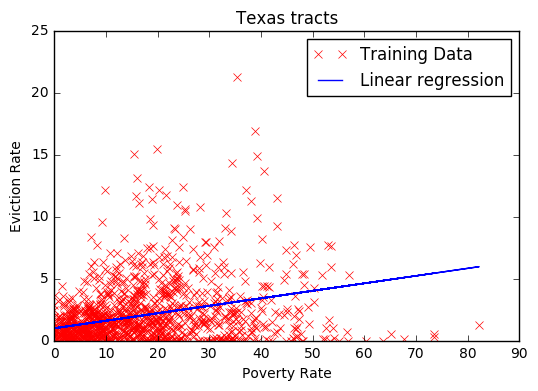

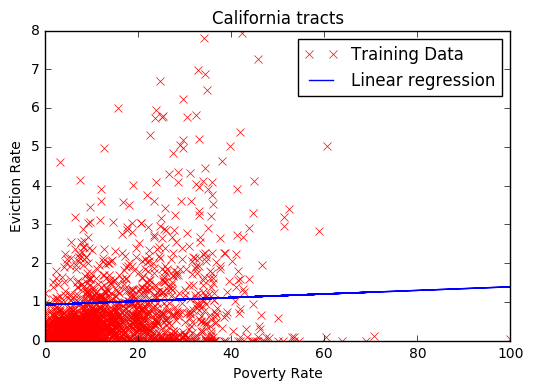

In [162]:
#Step 2: Linear Regression    
y_tex=np.matrix(Tex_data[:,14])   #we define this as a matrix so that the vectorization is correct
y_cal=np.matrix(Cal_data[:,14])   #we define this as a matrix so that the vectorization is correct


#12 is evictions
#13 is eviction-filings
#14 is eviction-rate
#15 is eviction-filing-rate

#Cal_filings = np.transpose(np.matrix(Cal_data[:,4]))
#Cal_evictions = np.transpose(np.matrix(Cal_data[:,5]))
Cal_poverty = np.transpose(np.matrix(Cal_data[:,2]))
Cal_burden = np.transpose(np.matrix(Cal_data[:,3]))

Tex_poverty = np.transpose(np.matrix(Tex_data[:,2]))
Tex_burden = np.transpose(np.matrix(Tex_data[:,3]))

X_tex = np.concatenate((np.ones((len(Tex_data[:,0]),1)),Tex_poverty),axis=1)
X_cal = np.concatenate((np.ones((len(Cal_data[:,0]),1)),Cal_poverty),axis=1)


#Column 1 contains 1s (necessary for regression) column 2-3 contain indicator variables
m_tex = len(y_tex) # number of training examples
m_cal = len(y_cal)

theta_tex = np.matrix([[1.0],[1.0]]);  #initial guess, theta(0) = y-intercept, theta(1) = slope
theta_cal = np.matrix([[1.0],[1.0]]);

alpha = .0000001;  #training step

num_iters = 1000;
#J_history = np.zeros((num_iters, 1));

for iter in range(1,num_iters):
    temp0_tex = theta_tex[0,0] - (alpha*(1/m_tex))*(theta_tex.transpose()*X_tex.transpose()-y_tex)*X_tex[:,0];
    temp1_tex = theta_tex[1,0] - (alpha*(1/m_tex))*(theta_tex.transpose()*X_tex.transpose()-y_tex)*X_tex[:,1];
    theta_tex[0,0] = temp0_tex;
    theta_tex[1,0] = temp1_tex;
    
    temp0_cal = theta_cal[0,0] - (alpha*(1/m_cal))*(theta_cal.transpose()*X_cal.transpose()-y_cal)*X_cal[:,0];
    temp1_cal = theta_cal[1,0] - (alpha*(1/m_cal))*(theta_cal.transpose()*X_cal.transpose()-y_cal)*X_cal[:,1];
    theta_cal[0,0] = temp0_cal;
    theta_cal[1,0] = temp1_cal;

#plt.figure(1)
#plt.plot(J_history)  #visualize cost function for debugging

plt.figure(2)
plt.plot (X_tex[:,1],y_tex.transpose(),'xr', label='Training Data')
plt.plot(X_tex[:,1], X_tex*theta_tex, '-', label='Linear regression')
plt.xlabel("Poverty Rate")
plt.ylabel("Eviction Rate")
plt.title("Texas tracts")
#plt.plot(8,prediction,'bo', label='2018 Prediction')
plt.legend()

plt.figure(3)
plt.plot (X_cal[:,1],y_cal.transpose(),'xr', label='Training Data')
plt.plot(X_cal[:,1], X_cal*theta_cal, '-', label='Linear regression')
plt.xlabel("Poverty Rate")
plt.ylabel("Eviction Rate")
plt.title("California tracts")
#plt.plot(8,prediction,'bo', label='2018 Prediction')
plt.legend()

In [144]:
df_Cal = pd.ExcelFile('California_all.xlsx').parse('California')  #NaN values removed and data managed in SQL prior to loading
Cal_data = df_Cal.values
df_Tex = pd.ExcelFile('Texas_all.xlsx').parse('Texas')  
Tex_data = df_Tex.values
print ("done")

done


In [158]:
#Step 2: Linear Regression    
y=np.matrix(Tex_data[:,14])   #we define this as a matrix so that the vectorization is correct

#12 is evictions
#13 is eviction-filings
#14 is eviction-rate
#15 is eviction-filing-rate

#Cal_filings = np.transpose(np.matrix(Cal_data[:,4]))
#Cal_evictions = np.transpose(np.matrix(Cal_data[:,5]))
#Cal_poverty = np.transpose(np.matrix(Cal_data[:,2]))
#Cal_burden = np.transpose(np.matrix(Cal_data[:,3]))

#Tex_poverty = np.transpose(np.matrix(Tex_data[:,2]))
#Tex_burden = np.transpose(np.matrix(Tex_data[:,3]))
Tex_white = np.transpose(np.matrix(Tex_data[:,4]))
Tex_afam = np.transpose(np.matrix(Tex_data[:,5]))
Tex_hispanic = np.transpose(np.matrix(Tex_data[:,6]))
Tex_amin = np.transpose(np.matrix(Tex_data[:,7]))
Tex_asian = np.transpose(np.matrix(Tex_data[:,8]))
Tex_nh_pi = np.transpose(np.matrix(Tex_data[:,9]))
Tex_multiple = np.transpose(np.matrix(Tex_data[:,10]))
Tex_other = np.transpose(np.matrix(Tex_data[:,11]))

#normalize data around 0 by subtracting the mean and dividing by the standard deviation
#Tex_poverty = (Tex_poverty - np.mean(Tex_poverty[:]))/np.std(Tex_poverty[:])
#Tex_burden = (Tex_burden - np.mean(Tex_burden[:]))/np.std(Tex_burden[:])
Tex_white = (Tex_white - np.mean(Tex_white[:]))/np.std(Tex_white[:])
Tex_afam = (Tex_afam - np.mean(Tex_afam[:]))/np.std(Tex_afam[:])
Tex_hispanic = (Tex_hispanic - np.mean(Tex_hispanic[:]))/np.std(Tex_hispanic[:])
Tex_amin = (Tex_amin - np.amin(Tex_white[:]))/np.std(Tex_amin[:])
Tex_asian = (Tex_asian - np.mean(Tex_asian[:]))/np.std(Tex_asian[:])
Tex_nh_pi = (Tex_nh_pi - np.mean(Tex_nh_pi[:]))/np.std(Tex_nh_pi[:])
Tex_multiple = (Tex_multiple - np.mean(Tex_multiple[:]))/np.std(Tex_multiple[:])
Tex_other = (Tex_other - np.mean(Tex_other[:]))/np.std(Tex_other[:])


X = np.concatenate((np.ones((len(Tex_data[:,0]),1)),Tex_white,Tex_afam,Tex_hispanic,Tex_amin,Tex_asian,Tex_nh_pi, Tex_multiple, Tex_other),axis=1)
#Column 1 contains 1s (necessary for regression) column 2-3 contain indicator variables
m = len(y); # number of training examples

theta = np.matrix([[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]]);  #initial guess, theta(0) = y-intercept, theta(1) = slope

alpha = .0000001;  #training step

num_iters = 1000;
J_history = np.zeros((num_iters, 1));

for iter in range(1,num_iters):
    temp0 = theta[0,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,0];
    temp1 = theta[1,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,1];
    temp2 = theta[2,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,2];
    temp3 = theta[3,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,3];
    temp4 = theta[4,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,4];
    temp5 = theta[5,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,5];
    temp6 = theta[6,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,6];
    temp7 = theta[7,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,7];
    temp8 = theta[8,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,8];
#    temp9 = theta[9,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,9];
#    temp10 = theta[10,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,10];

    theta[0,0] = temp0;
    theta[1,0] = temp1;
    theta[2,0] = temp2;
    theta[3,0] = temp3;
    theta[4,0] = temp4;                
    theta[5,0] = temp5;
    theta[6,0] = temp6;
    theta[7,0] = temp7;
    theta[8,0] = temp8; 
#    theta[9,0] = temp9;
#    theta[10,0] = temp10; 

    
    J_history[iter,0] = ((1/(2*m))*(np.sum(np.square(((theta.transpose()*X.transpose()-y))))))  #Track cost function for debugging

#plt.figure(1)
#plt.plot(J_history)  #visualize cost function for debugging

#plt.figure(2)
print("Texas")
print(theta[1,0],"White\n",theta[2,0],"Af Am\n",theta[3,0],"Hispanic\n",theta[4,0],"Am In\n",theta[5,0],"Asian\n",theta[6,0],"Nh_Pi\n",theta[7,0],"Multiple\n",theta[8,0],"Other\n")

Texas
0.915175811489 White
 1.03719330105 Af Am
 1.12275369671 Hispanic
 0.41231039186 Am In
 0.859877941468 Asian
 0.892516323257 Nh_Pi
 0.862069222611 Multiple
 0.876819202664 Other



In [157]:
#Step 2: Linear Regression    
y=np.matrix(Cal_data[:,14])   #we define this as a matrix so that the vectorization is correct

#12 is evictions
#13 is eviction-filings
#14 is eviction-rate
#15 is eviction-filing-rate

#Cal_filings = np.transpose(np.matrix(Cal_data[:,4]))
#Cal_evictions = np.transpose(np.matrix(Cal_data[:,5]))
#Cal_poverty = np.transpose(np.matrix(Cal_data[:,2]))
#Cal_burden = np.transpose(np.matrix(Cal_data[:,3]))

#Cal_poverty = np.transpose(np.matrix(Cal_data[:,2]))
#Cal_burden = np.transpose(np.matrix(Cal_data[:,3]))
Cal_white = np.transpose(np.matrix(Cal_data[:,4]))
Cal_afam = np.transpose(np.matrix(Cal_data[:,5]))
Cal_hispanic = np.transpose(np.matrix(Cal_data[:,6]))
Cal_amin = np.transpose(np.matrix(Cal_data[:,7]))
Cal_asian = np.transpose(np.matrix(Cal_data[:,8]))
Cal_nh_pi = np.transpose(np.matrix(Cal_data[:,9]))
Cal_multiple = np.transpose(np.matrix(Cal_data[:,10]))
Cal_other = np.transpose(np.matrix(Cal_data[:,11]))

#normalize data around 0 by subtracting the mean and dividing by the standard deviation
#Cal_poverty = (Cal_poverty - np.mean(Cal_poverty[:]))/np.std(Cal_poverty[:])
#Cal_burden = (Cal_burden - np.mean(Cal_burden[:]))/np.std(Cal_burden[:])
Cal_white = (Cal_white - np.mean(Cal_white[:]))/np.std(Cal_white[:])
Cal_afam = (Cal_afam - np.mean(Cal_afam[:]))/np.std(Cal_afam[:])
Cal_hispanic = (Cal_hispanic - np.mean(Cal_hispanic[:]))/np.std(Cal_hispanic[:])
Cal_amin = (Cal_amin - np.amin(Cal_white[:]))/np.std(Cal_amin[:])
Cal_asian = (Cal_asian - np.mean(Cal_asian[:]))/np.std(Cal_asian[:])
Cal_nh_pi = (Cal_nh_pi - np.mean(Cal_nh_pi[:]))/np.std(Cal_nh_pi[:])
Cal_multiple = (Cal_multiple - np.mean(Cal_multiple[:]))/np.std(Cal_multiple[:])
Cal_other = (Cal_other - np.mean(Cal_other[:]))/np.std(Cal_other[:])


X = np.concatenate((np.ones((len(Cal_data[:,0]),1)),Cal_white,Cal_afam,Cal_hispanic,Cal_amin,Cal_asian,Cal_nh_pi, Cal_multiple, Cal_other),axis=1)
#Column 1 contains 1s (necessary for regression) column 2-3 contain indicator variables
m = len(y); # number of training examples

theta = np.matrix([[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]]);  #initial guess, theta(0) = y-intercept, theta(1) = slope

alpha = .0000001;  #training step

num_iters = 1000;
J_history = np.zeros((num_iters, 1));

for iter in range(1,num_iters):
    temp0 = theta[0,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,0];
    temp1 = theta[1,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,1];
    temp2 = theta[2,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,2];
    temp3 = theta[3,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,3];
    temp4 = theta[4,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,4];
    temp5 = theta[5,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,5];
    temp6 = theta[6,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,6];
    temp7 = theta[7,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,7];
    temp8 = theta[8,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,8];
#    temp9 = theta[9,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,9];
#    temp10 = theta[10,0] - (alpha*(1/m))*(theta.transpose()*X.transpose()-y)*X[:,10];

    theta[0,0] = temp0;
    theta[1,0] = temp1;
    theta[2,0] = temp2;
    theta[3,0] = temp3;
    theta[4,0] = temp4;                
    theta[5,0] = temp5;
    theta[6,0] = temp6;
    theta[7,0] = temp7;
    theta[8,0] = temp8; 
#    theta[9,0] = temp9;
#    theta[10,0] = temp10; 

    
    J_history[iter,0] = ((1/(2*m))*(np.sum(np.square(((theta.transpose()*X.transpose()-y))))))  #Track cost function for debugging

#print("Abuse of Authority is most highly correlated with a maximum correlation coefficiten of",theta[1,0])
#plt.figure(1)
#plt.plot(J_history)  #visualize cost function for debugging

#plt.figure(2)
#plt.plot(Cal_white, y.transpose(),'xr')
#plt.plot (X[:,1],y.transpose(),'or', label='Training Data')
#plt.plot(X[:,1], X*theta, '-', label='Linear regression')
#plt.plot(8,prediction,'bo', label='2018 Prediction')
#plt.legend()
print("California\n")
print(theta[1,0],"White\n",theta[2,0],"Af Am\n",theta[3,0],"Hispanic\n",theta[4,0],"Am In\n",theta[5,0],"Asian\n",theta[6,0],"Nh_Pi\n",theta[7,0],"Multiple\n",theta[8,0],"Other\n")

California

0.991008177505 White
 0.910955617687 Af Am
 1.11695147925 Hispanic
 0.225666926322 Am In
 0.929282543973 Asian
 0.850776438129 Nh_Pi
 0.839087875285 Multiple
 0.834569630348 Other

